In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize_dataset(df):
    cdict = {0:'blue',1:'red'}
    colors = [cdict[i] for i in df['y']]
    plt.scatter(df['x1'], df['x2'], s = 2, c=colors)
    
def normalize(x):
    x = np.array(x)
    return x/np.sum(np.abs(x))
def generate_logistic_regression_dataset(num_features = 2, n = 1000, sparse = False):
    X = np.random.uniform(low = -2, high = 2, size = (n, num_features))
    col_names = []
    for i in range(num_features):
        col_names.append('x'+str(i+1))
    df = pd.DataFrame(X, columns = col_names)
    hidden_params = np.random.uniform(low = -1, high = 1, size = (num_features+1))
    hidden_params[-1] = 0
    if(sparse):
        mask = np.random.choice(np.arange(num_features), size=int(0.5*num_features))
        hidden_params[mask] = 0
    hidden_params = np.round(normalize(hidden_params),2)
    df['y'] = 0
    df.loc[(np.matmul(df[col_names].values,hidden_params[:-1]) + hidden_params[-1] < 0), 'y'] = 1
    y = np.zeros(n)
    return df, hidden_params

In [3]:
class LogisticRegression:
    def __init__(self, learning_rate  = 0.5):
        self._intercept = np.random.normal(size = 1)
        self.lr = learning_rate 
        
    def train(self, X ,y, max_iter = 1000):
        self.num_features = X.shape[1]
        self.weights = np.random.normal(size = self.num_features)
        self._intercept = np.random.normal(size = 1)
        num_iter = 0
        lossls = []
        while(num_iter < max_iter ):
            num_iter += 1
            y_pred = self.predict(X)
            gradients, gradient_intercept = self.gradient_step(X, y, y_pred)

            self.weights = self.weights - self.lr * gradients
            self._intercept = self._intercept - self.lr * gradient_intercept
            loss = self.cross_entropy_loss(y, y_pred)
            lossls.append(loss)
        
            
        print('Training Done in {} iteration'.format(num_iter))
        self.plot_loss(lossls)
        return self.cross_entropy_loss(y,y_pred)
    def plot_decision_boundary(self):
        assert self.num_features == 2
        x1range = np.arange(11)*0.4 - 2 
        x2range = []
        for x1 in x1range:
            x2 = (-1*self._intercept - self.weights[0]*x1)/self.weights[1]
            x2range.append(x2)
        plt.plot(x1range, x2range, c = 'green', linewidth = 3)
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        
    def plot_loss(self, lossls):
        num_iter = len(lossls)
        plt.plot(np.arange(num_iter),lossls)
        plt.title('Loss over iteration')
        plt.show()
        
    def sigmoid(self,y):
        return 1/(1+np.exp(-1*y))
    
    def predict(self, X):
        return self.sigmoid(np.matmul(X, self.weights) + self._intercept)
    
    def _log(self, n):
        return np.log(n+1e-6)
    
    def cross_entropy_loss(self, y, y_pred):
        return np.mean(-(y*self._log(y_pred) + (1-y)*self._log(1-y_pred)))
    
    def gradient_step(self, X, y, y_pred):
        gradients = np.zeros(self.num_features)
        gradient_intercept = np.zeros(1)
        for j in range(self.num_features):
            gradients[j] = np.mean((y_pred-y)*X[:,j])
        gradient_intercept = np.mean((y_pred-y))
        return gradients, gradient_intercept

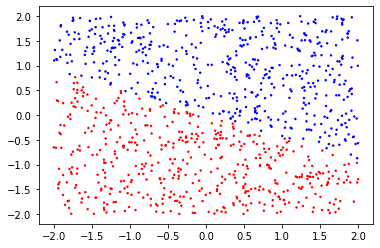

,x1,x2,y
0,-0.132785,1.366685,0
1,0.525413,-1.826854,1
2,-1.277602,1.806392,0
3,0.765448,-0.681245,1
4,-0.926455,-0.293666,1


Training Done in 1000 iteration


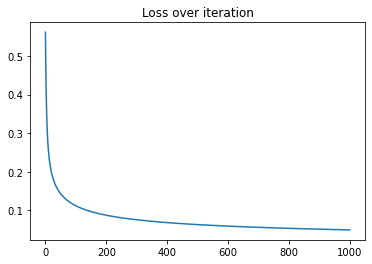

,Parameter,True Coeff,Estimated Coeff
0,x1,0.31,-0.30
1,x2,0.69,-0.69
2,intercept,0.00,-0.01


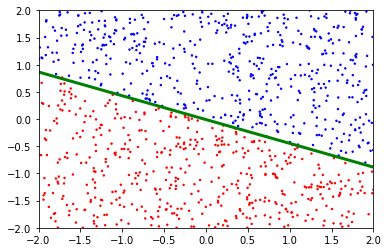

In [7]:
df, hidden_params = generate_logistic_regression_dataset(n = 1000)
visualize_dataset(df)
plt.show()
display(df[:5])
model = LogisticRegression(learning_rate = 0.5)
model.train(df[df.columns[:-1]].values, df['y'].values)

estimated_params = np.round(normalize(list(model.weights)+list(model._intercept)),2)
display(pd.DataFrame(zip(list(df.columns[:-1])+['intercept'], hidden_params,estimated_params), columns = ['Parameter', 'True Coeff','Estimated Coeff']))

visualize_dataset(df)
model.plot_decision_boundary()
plt.show()